Re-create the following figure using the `mpg` data set.

<img src="figs/example.png" style="width: 600px;" />

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
mpg |> head(1)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


Hints:
- you can make a table with median values using `group_by` and `summarize`
- use `geom_crossbar` to create the vertical line for median values
- use `fct_reorder` to set the levels for `class`

In [12]:
median_values= mpg |>
    group_by(class) |>
    summarize(cty = median(cty))

median_values

class,cty
<chr>,<dbl>
2seater,15
compact,20
midsize,18
minivan,16
pickup,13
subcompact,19
suv,13


In [23]:
mpg2 = mpg |>
    mutate(class = fct_reorder(class, cty, .fun=median))

mpg2 |> head(1)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<fct>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


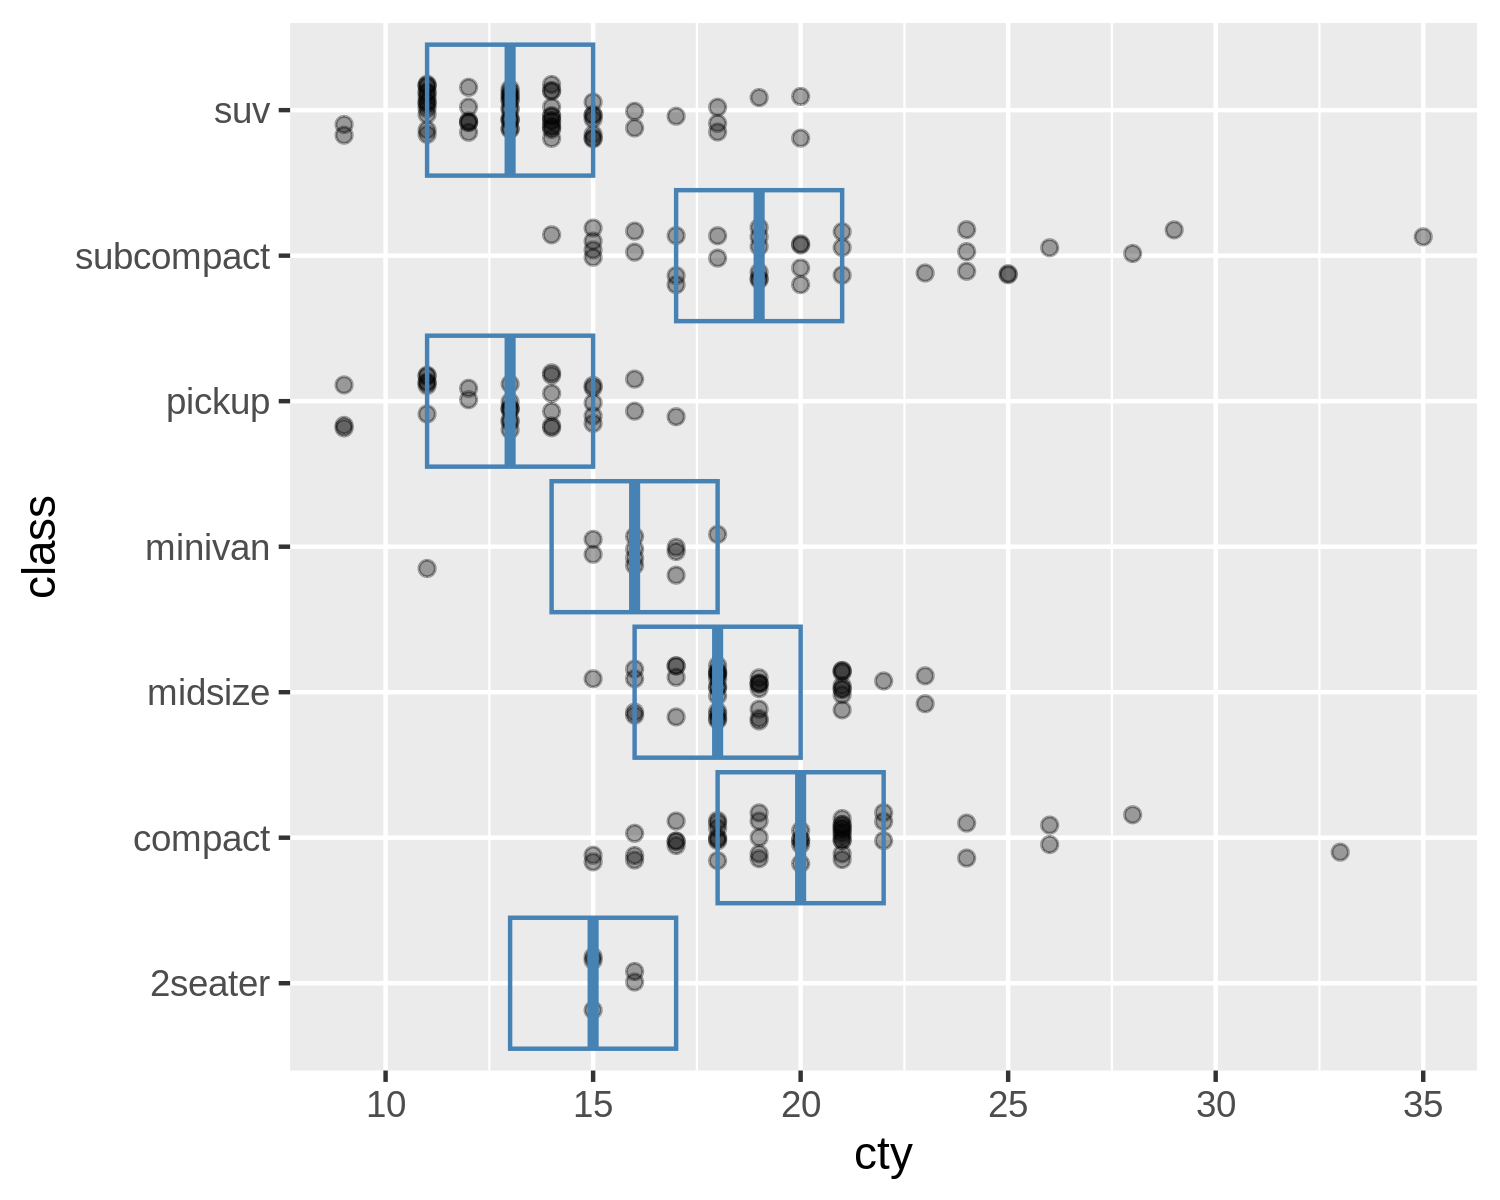

In [19]:
p = ggplot(mpg, aes(x = cty, y = class)) +
    geom_point(alpha = 0.35, position = position_jitter(height = 0.2, width = 0)) +
   # geom_point(data=median_values, color='red') +
    geom_crossbar(color='steelblue', data=median_values, mapping = aes(xmin=cty - 2, xmax=cty + 2))

p

In [21]:
mpg |> 
    group_by(class) |>
    mutate(cty_median = median(cty)) |>
    ungroup() |>
    arrange(cty_median) |>
    mutate(class = fct_inorder(class)) |>
    pull(class) |> levels()

[1] "suv"        "pickup"     "2seater"    "minivan"    "midsize"   
[6] "subcompact" "compact"